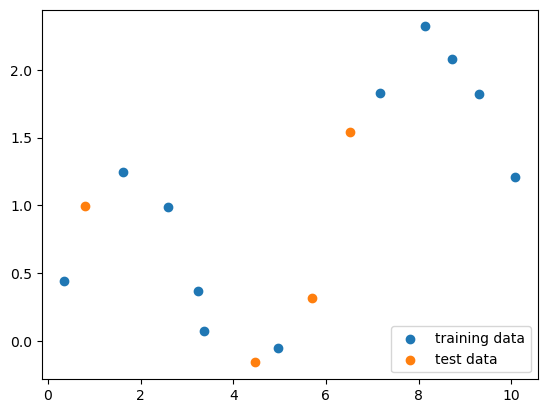

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4)
plt.show()

In [10]:
X_train

array([10.08877265,  3.23065446,  1.62431903,  9.31004929,  7.17166586,
        4.96972856,  8.14799756,  2.59103578,  0.35281047,  3.375973  ,
        8.72363612])

In [18]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree_predictions = np.zeros((4,100))

# for degree in range(1, 5):
#     poly = PolynomialFeatures(degree=degree)
#     X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
#     X_poly_test = poly.transform(X_test.reshape(-1, 1))
#     model = LinearRegression()
#     model.fit(X_poly_train, y_train)
#     degree_predictions[degree-1, :] = model.predict(poly.transform(np.linspace(0, 10, 100).reshape(-1, 1)))
    
ploy = PolynomialFeatures(degree=2)
X_poly_train = ploy.fit_transform(X_train.reshape(-1, 1))
X_poly_train
# YOUR CODE HERE
# raise NotImplementedError()


array([[  1.        ,  10.08877265, 101.78333351],
       [  1.        ,   3.23065446,  10.43712821],
       [  1.        ,   1.62431903,   2.6384123 ],
       [  1.        ,   9.31004929,  86.67701776],
       [  1.        ,   7.17166586,  51.43279117],
       [  1.        ,   4.96972856,  24.69820194],
       [  1.        ,   8.14799756,  66.38986421],
       [  1.        ,   2.59103578,   6.71346643],
       [  1.        ,   0.35281047,   0.12447523],
       [  1.        ,   3.375973  ,  11.39719367],
       [  1.        ,   8.72363612,  76.10182709]])

In [30]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4,100))
    
    for index, degree in enumerate([1, 3, 6, 9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        degree_predictions[index, :] = model.predict(poly.transform(np.linspace(0, 10, 100).reshape(-1, 1)))
        
    return degree_predictions

answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

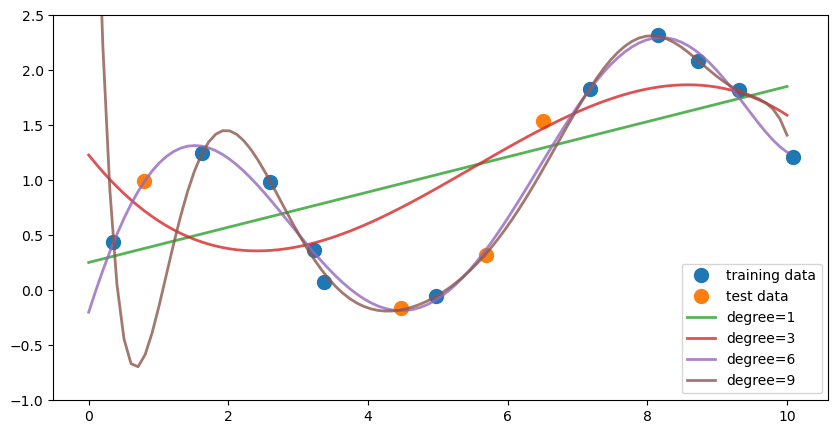

In [31]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


In [34]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train = np.array([])
    r2_test = np.array([])
    
    for degree in range(0, 10):
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
        X_poly_test = poly.transform(X_test.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        r2_train = np.append(r2_train, r2_score(y_train, model.predict(X_poly_train)))
        r2_test = np.append(r2_test, r2_score(y_test, model.predict(X_poly_test)))
        
    return r2_train, r2_test

answer_two()[0].shape, answer_two()[1].shape

((10,), (10,))

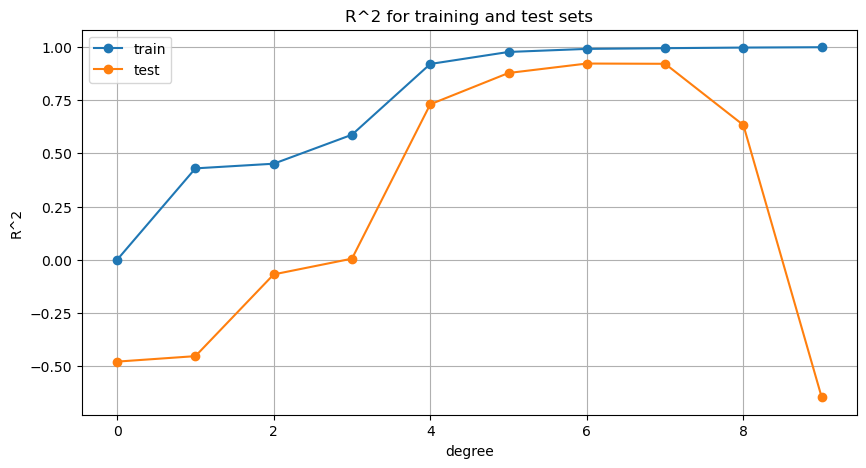

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([], dtype=int64))

In [ ]:
def answer_three_plot():
    r2_train, r2_test = answer_two()
    plt.figure(figsize=(10,5))
    plt.plot(range(0, 10), r2_train, label='train', marker='o')
    plt.plot(range(0, 10), r2_test, label='test', marker='o')
    plt.xlabel('degree')
    plt.ylabel('R^2')
    plt.legend()
    plt.title('R^2 for training and test sets')
    plt.grid()
    plt.show()
    
answer_three_plot()

# Determine overfitting and underfitting and good gerneralization
def answer_four():
    r2_train, r2_test = answer_two()
    good_generalization = np.min(np.abs(r2_train - r2_test))

In [58]:
threshold = 0.8
overfitting = []
underfitting = []
good_generalization = []

r2_train, r2_test = answer_two()
for degree in range(0, 10):
    if r2_train[degree] < threshold and r2_test[degree] < threshold:
        underfitting.append(degree)
    elif r2_train[degree] > threshold and r2_test[degree] < threshold:
        overfitting.append(degree)
    elif r2_train[degree] > threshold and r2_test[degree] > threshold:
        good_generalization.append(degree)
        
print("Overfitting degrees:", overfitting)
print("Underfitting degrees:", underfitting)
print("Good generalization degrees:", good_generalization)

Overfitting degrees: [4, 8, 9]
Underfitting degrees: [0, 1, 2, 3]
Good generalization degrees: [5, 6, 7]


In [59]:
def answer_three():
    threshold = 0.8
    overfitting = []
    underfitting = []
    good_generalization = []

    r2_train, r2_test = answer_two()
    for degree in range(0, 10):
        if r2_train[degree] < threshold and r2_test[degree] < threshold:
            underfitting.append(degree)
        elif r2_train[degree] > threshold and r2_test[degree] < threshold:
            overfitting.append(degree)
        elif r2_train[degree] > threshold and r2_test[degree] > threshold:
            good_generalization.append(degree)
            
    return overfitting, underfitting, good_generalization

answer_three()

([4, 8, 9], [0, 1, 2, 3], [5, 6, 7])

In [60]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    poly = PolynomialFeatures(degree=12)
    X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
    X_poly_test = poly.transform(X_test.reshape(-1, 1))
    
    lasso = Lasso(alpha=0.01, max_iter=10000, tol=0.1)
    lasso.fit(X_poly_train, y_train)
    Lasso_R2_test_score = r2_score(y_test, lasso.predict(X_poly_test))
    
    linear_regression = LinearRegression()
    linear_regression.fit(X_poly_train, y_train)
    LinearRegression_R2_test_score = r2_score(y_test, linear_regression.predict(X_poly_test))
    
    return LinearRegression_R2_test_score, Lasso_R2_test_score

answer_four()

(-4.311980555741178, 0.6051396919570099)

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

In [62]:
mush_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [63]:
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [64]:
mush_df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [65]:
mush_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: bool(119)
memory usage: 944.2 KB


In [ ]:
mush_df2.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train2, y_train2)
dtc.feature_names_in_
dtc.feature_importances_

feature_importances = pd.Series(dtc.feature_importances_, index=X_mush.columns)
feature_importances.sort_values(ascending=False, inplace=True)
feature_importances[:5].index.tolist()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

In [ ]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score

    dtc = DecisionTreeClassifier(random_state=0)
    dtc.fit(X_train2, y_train2)
    dtc.feature_names_in_
    dtc.feature_importances_

    feature_importances = pd.Series(dtc.feature_importances_, index=X_mush.columns)
    feature_importances.sort_values(ascending=False, inplace=True)
    
    print("Top 5 features:")
    ret_val = []
    for feture in feature_importances.index.tolist():
        print(feture)
        
    return feature_importances[:5]

In [89]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
        
    classifier = SVC(random_state=0, kernel='rbf', C=1.0)
    val_curve = validation_curve(classifier, X_mush, y_mush, param_name='gamma', param_range=np.logspace(-4,1,6), cv=3, n_jobs=2)

    mean_train_scores = np.mean(val_curve[0], axis=1)
    mean_test_scores = np.mean(val_curve[1], axis=1)
    
    return mean_train_scores, mean_test_scores

answer_six()

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

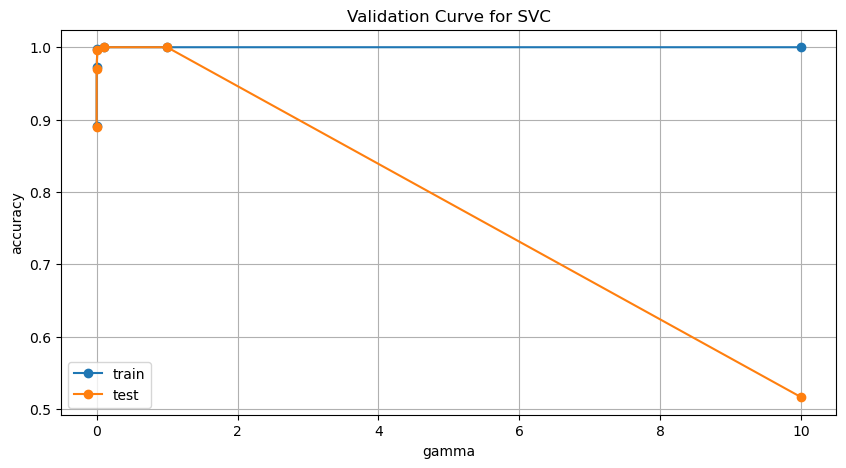

In [86]:
# Determine underfitting and overfitting
plt.figure(figsize=(10,5))
plt.plot(np.logspace(-4,1,6), answer_six()[0], label='train', marker='o')
plt.plot(np.logspace(-4,1,6), answer_six()[1], label='test', marker='o')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.legend()
plt.title('Validation Curve for SVC')
plt.grid()
plt.show()

In [87]:
def answer_seven():

    threshold = 0.8
    overfitting = []
    underfitting = []
    good_generalization = []

    train_scores, test_scores = answer_six()
    for i, gamma in enumerate(np.logspace(-4, 1, 6)):
        if train_scores[i] < threshold and test_scores[i] < threshold:
            underfitting.append(gamma)
        elif train_scores[i] > threshold and test_scores[i] < threshold:
            overfitting.append(gamma)
        elif train_scores[i] > threshold and test_scores[i] > threshold:
            good_generalization.append(gamma)
            
    return underfitting, overfitting, good_generalization

answer_seven()

([],
 [np.float64(10.0)],
 [np.float64(0.0001),
  np.float64(0.001),
  np.float64(0.01),
  np.float64(0.1),
  np.float64(1.0)])

In [91]:
val = "odor_c"
print(val[:-2])  # This will return 'odor'

odor
